# Proyecto: "Tendencias Estacionales en la Visualización de Juegos en Twitch y su influencia en la industria"
## Integrantes: Catalina Arrey, Elías Martínez y Anays Castillo

## Introducción
En el panorama actual de la era digital, la plataforma líder de transmisión en vivo Twitch ha surgido como un actor destacado en la industria de los videojuegos, redefiniendo la manera en que los jugadores se relacionan, consumen contenido y toman decisiones de adquisición. Con una base de más de dos millones de transmisores regulares y una audiencia global que supera los 12 millones de jugadores, Twitch se ha consolidado como un pilar fundamental en la promoción y comercialización de videojuegos. Desde proporcionar una experiencia detallada y personalizada de los lanzamientos más recientes hasta fungir como una fuente de conocimiento y aprendizaje en el ámbito del desarrollo de videojuegos, Twitch ha transformado radicalmente la forma en que los jugadores descubren, exploran y se involucran en el universo de los videojuegos.

## Hipótesis
Nuestra hipótesis plantea que durante ciertas épocas del año habrá un aumento significativo en las horas de visualización de distintos juegos, debido a los períodos de lanzamiento de nuevos juegos, eventos de eSports, festividades importantes, y otros factores que generan un mayor interés y participación de la comunidad de jugadores y espectadores en la plataforma.

## Metodología
Para nuestro análisis, utilizaremos datos obtenidos de Kaggle, donde se encuentra un dataset recopilado de sullygnome.com, un sitio especializado en análisis y estadísticas de Twitch que utiliza la API oficial de Twitch para recopilar estos datos.

### Twitch game data
- Rank: Rango del juego en popularidad para el mes.
- Game: Nombre del juego.
- Month: Mes del año.
- Year: Año.
- Hours_watched: Total de horas vistas.
- Hours_streamed: Total de horas transmitidas.
- Peak_viewers: Máximo número de espectadores concurrentes.
- Peak_channels: Máximo número de canales transmitiendo el juego simultáneamente.
- Streamers: Número total de streamers que transmitieron el juego.
- Avg_viewers: Número promedio de espectadores.
- Avg_channels: Número promedio de canales transmitiendo el juego.
- Avg_viewer_ratio: Relación promedio entre espectadores y canales.

### Twitch global data
- year: Año.
- Month: Mes.
- Hours_watched: Total de horas vistas en toda la plataforma.
- Avg_viewers: Número promedio de espectadores en toda la plataforma.
- Peak_viewers: Máximo número de espectadores concurrentes en toda la plataforma.
- Streams: Número total de transmisiones realizadas.
- Avg_channels: Número promedio de canales activos.
- Games_streamed: Número de juegos transmitidos.
- Viewer_ratio: Relación promedio entre espectadores y canales.

## Importación de Librerías y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
game_data = pd.read_csv('Datasets/Twitch_game_data.csv',encoding='latin1')
global_data = pd.read_csv('Datasets/Twitch_global_data.csv',encoding='latin1')

In [2]:
# Describir el dataset
game_data.head()


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [3]:
global_data.head()

,Year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85


In [4]:
# Describir el dataset
game_data.describe()

,Rank,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,18600.000000,18600.000000,18600.000000,1.860000e+04,1.860000e+04,1.860000e+04,18600.000000,1.860000e+04,18600.000000,18600.000000,18600.000000
mean,100.500000,6.354839,2019.387097,5.570829e+06,1.797605e+05,6.228739e+04,658.638387,2.184601e+04,7641.466505,246.107634,75.470928
std,57.735857,3.406743,2.238686,1.885594e+07,5.578888e+05,1.496745e+05,2632.524422,6.507139e+04,25872.149790,765.147334,328.909901
min,1.000000,1.000000,2016.000000,8.981100e+04,1.900000e+01,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.670000
25%,50.750000,3.000000,2017.000000,4.705542e+05,1.480725e+04,9.548750e+03,61.000000,1.796750e+03,645.000000,20.000000,16.240000
50%,100.500000,6.000000,2019.000000,9.982500e+05,3.865150e+04,2.273850e+04,146.000000,5.006000e+03,1370.000000,52.000000,29.300000
75%,150.250000,9.000000,2021.000000,2.804888e+06,1.031208e+05,5.280825e+04,370.000000,1.327775e+04,3852.000000,141.000000,57.312500
max,200.000000,12.000000,2023.000000,3.445520e+08,1.024570e+07,3.462517e+06,129860.000000,1.013324e+06,479209.000000,13789.000000,13601.870000


In [5]:
# Describir el dataset
global_data.describe()

,Year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
count,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000
mean,2019.387097,6.354839,1.222745e+09,1.677215e+06,3.446440e+06,1.609115e+07,63310.752688,26386.784946,26.723871
std,2.250760,3.425116,6.175370e+08,8.475923e+05,1.638765e+06,6.343214e+06,33446.894562,11193.569495,1.545152
min,2016.000000,1.000000,3.628332e+08,5.046350e+05,1.186009e+06,5.507554e+06,16592.000000,12134.000000,22.650000
25%,2017.000000,3.000000,6.012512e+08,8.092200e+05,1.835725e+06,9.288649e+06,28181.000000,16871.000000,25.710000
50%,2019.000000,6.000000,9.490505e+08,1.313721e+06,2.933491e+06,1.576931e+07,53882.000000,20536.000000,26.790000
75%,2021.000000,9.000000,1.817120e+09,2.520054e+06,4.816995e+06,2.216466e+07,94164.000000,36406.000000,28.040000
max,2023.000000,12.000000,2.308295e+09,3.112681e+06,6.707070e+06,2.759115e+07,122763.000000,44571.000000,30.390000


Bajo nuestro contexto de Twitch y la visualización de juegos, los análisis de series temporales podrían aplicarse para entender cómo cambia la popularidad de ciertos juegos en función del tiempo, como las fluctuaciones estacionales, los picos de audiencia durante eventos específicos o los cambios en las preferencias de los espectadores a lo largo del año. Esto proporciona información valiosa para los streamers, desarrolladores de juegos y anunciantes para planificar estrategias y campañas de manera más efectiva.

/tmp/ipykernel_10523/1204793392.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  global_time_series.index = pd.date_range(start='2016-01-01', periods=len(global_time_series), freq='M')


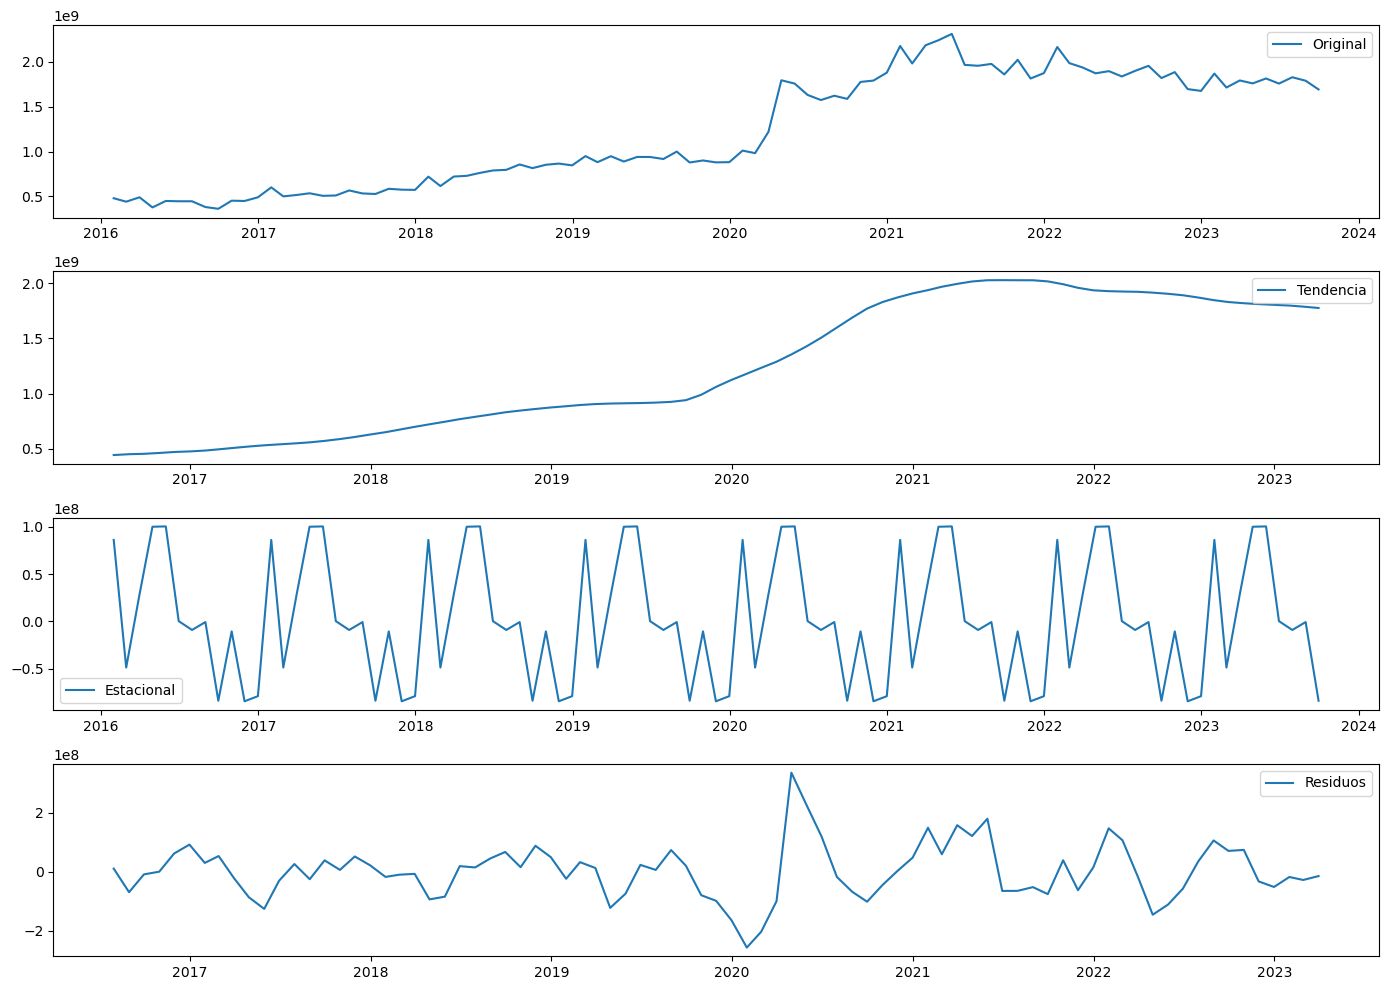

In [6]:
# Importar librerías adicionales
from statsmodels.tsa.seasonal import seasonal_decompose

# Análisis de serie temporal para el dataset global
global_time_series = global_data.groupby(['Year', 'Month'])['Hours_watched'].sum()
global_time_series.index = pd.date_range(start='2016-01-01', periods=len(global_time_series), freq='M')

# Descomposición de la serie temporal
global_decomposition = seasonal_decompose(global_time_series, model='additive')
global_trend = global_decomposition.trend
global_seasonal = global_decomposition.seasonal
global_residual = global_decomposition.resid

# Graficar la descomposición
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(global_time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(global_trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(global_seasonal, label='Estacional')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(global_residual, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Para organizar los datasets y filtrar los datos por año, primero necesitamos cargar los datos y luego aplicar los filtros necesarios. Vamos a proceder con esta tarea:

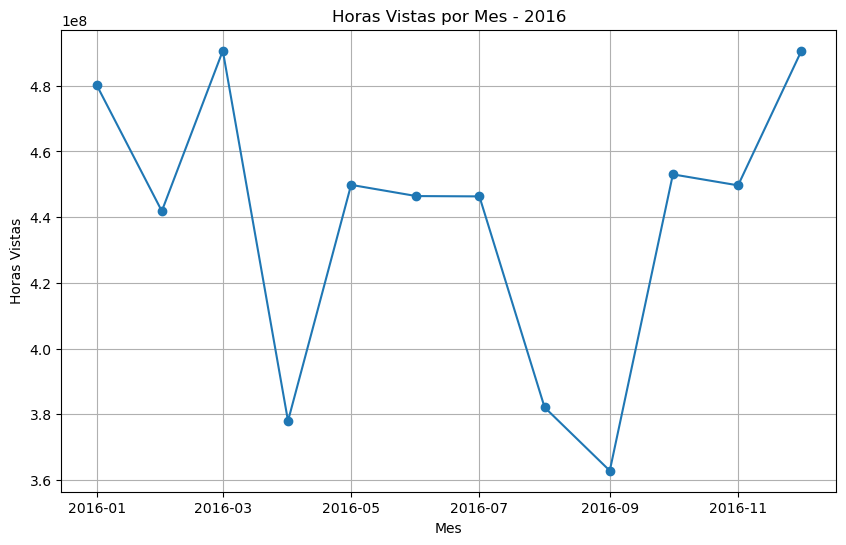

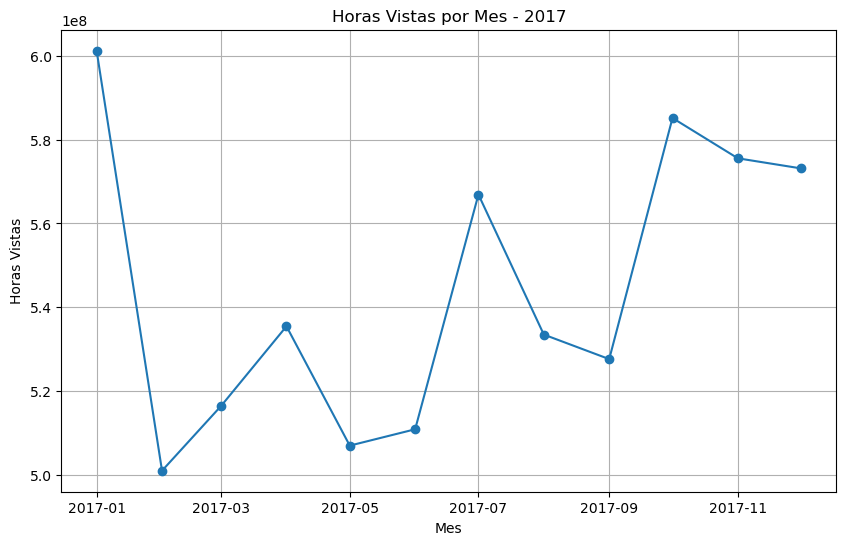

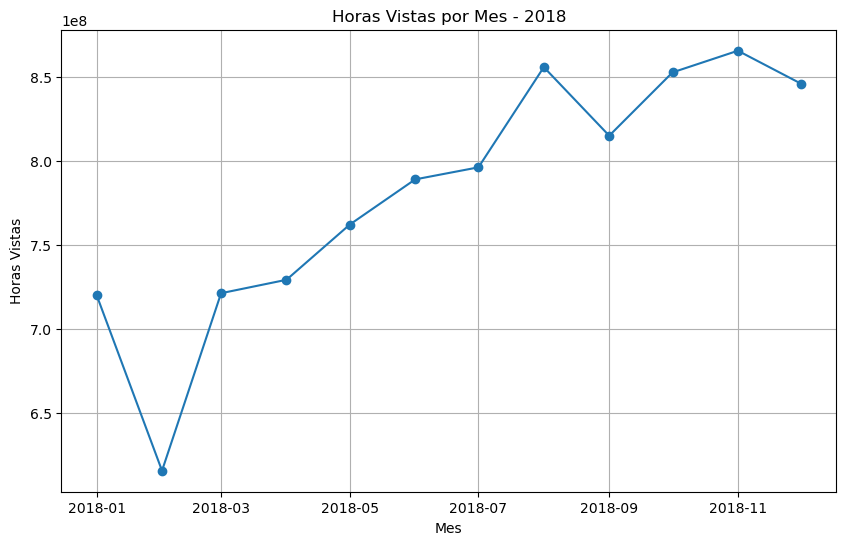

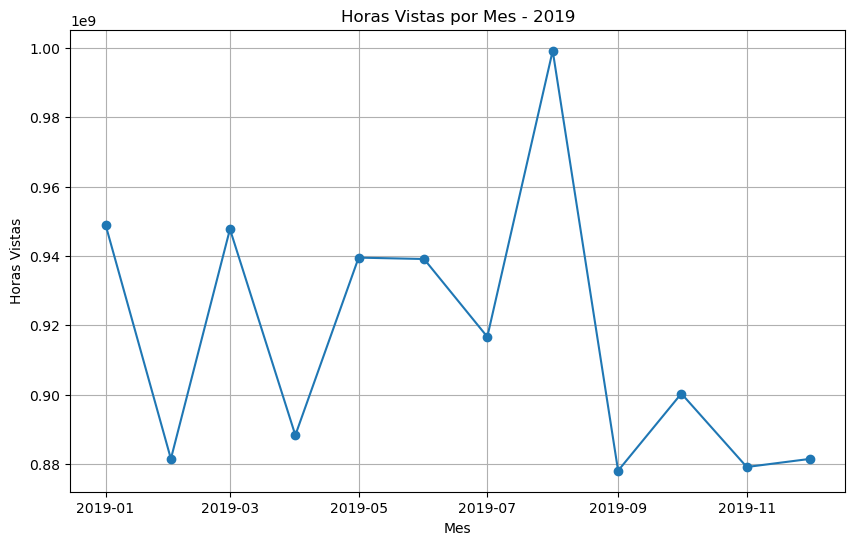

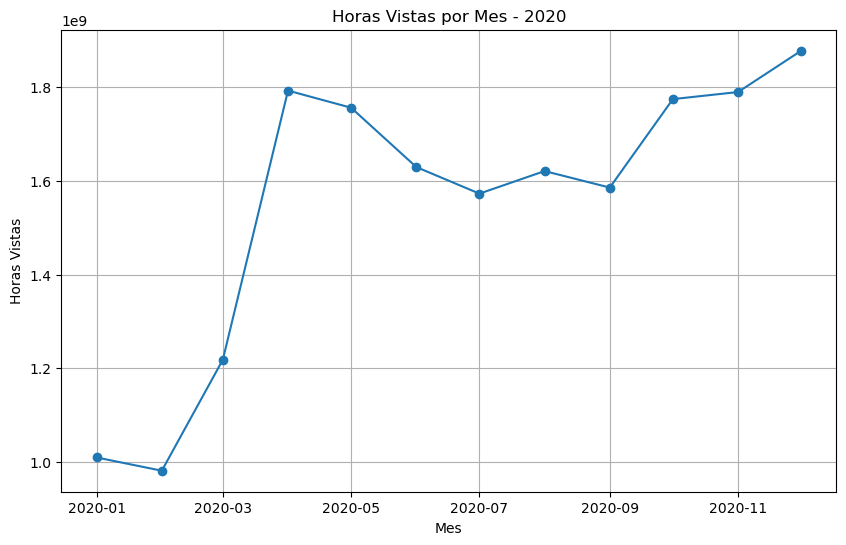

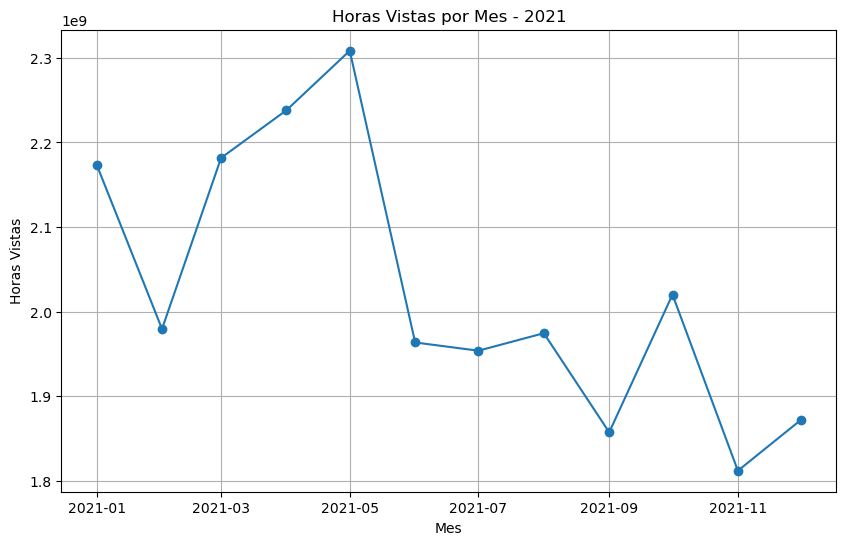

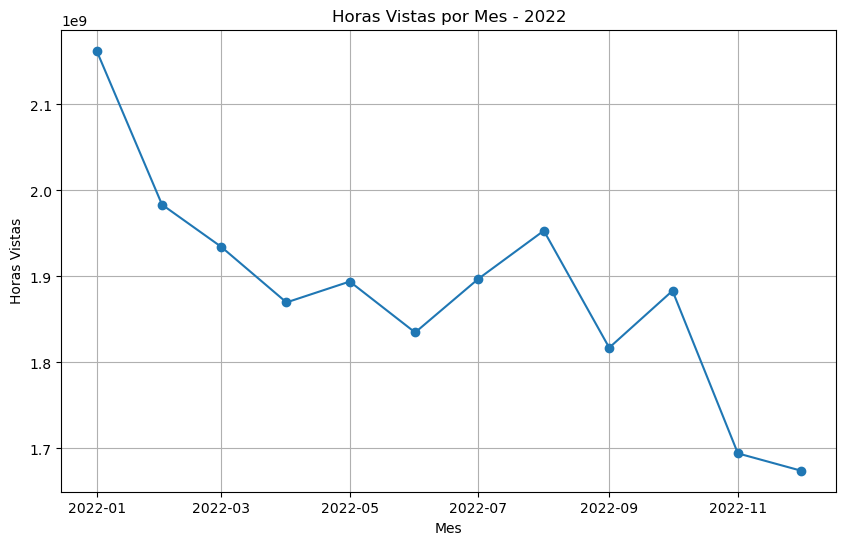

In [12]:
# Filtrar los datos por año
def filtrar_por_año(dataset, año):
    return dataset[dataset["Year"] == año]

# Seleccionar los años de interés (2016-2022)
años_de_interes = list(range(2016, 2022 + 1))

# Aplicar el filtro para cada año
global_data_por_año = {año: filtrar_por_año(global_data, año) for año in años_de_interes}

# Plot the time series for each year to observe monthly variations
def plot_time_series_by_year(data, year):
    data.index = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Hours_watched'], marker='o', linestyle='-')
    plt.title(f'Horas Vistas por Mes - {year}')
    plt.xlabel('Mes')
    plt.ylabel('Horas Vistas')
    plt.grid(True)
    plt.show()

# Plot the time series for each year of interest
for año in años_de_interes:
    plot_time_series_by_year(global_data_por_año[año], año)


## Análisis Comparativo:

Comparar los datos de diferentes años para identificar cambios y tendencias.
Realizar comparaciones específicas entre meses de distintos años para observar variaciones estacionales.

<Figure size 1200x800 with 0 Axes>

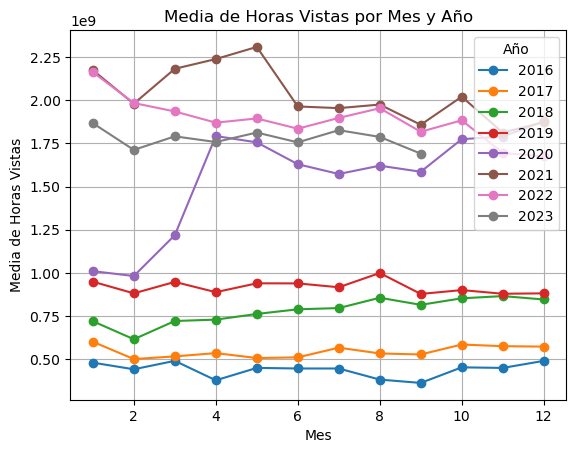

('Estadísticas_Descriptivas_por_Año.csv',
 'Media_Horas_Vistas_por_Mes_y_Año.png')

In [17]:
# Análisis Descriptivo: Resumen estadístico de las métricas clave por año
descriptive_stats = global_data.groupby('Year').describe()

# Guardar el resumen estadístico en un archivo CSV para revisión
descriptive_stats.to_csv('Estadísticas_Descriptivas_por_Año.csv')

# Comparar los datos de diferentes años: Media de las horas vistas por mes
mean_hours_watched_by_year = global_data.groupby(['Year', 'Month'])['Hours_watched'].mean().unstack(level=0)

# Visualización de la media de horas vistas por mes y año
plt.figure(figsize=(12, 8))
mean_hours_watched_by_year.plot(marker='o')
plt.title('Media de Horas Vistas por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Media de Horas Vistas')
plt.legend(title='Año')
plt.grid(True)
#plt.savefig('/mnt/data/Media_Horas_Vistas_por_Mes_y_Año.png')
plt.show()

# Proveer enlaces a los archivos generados
descriptive_stats_file = 'Estadísticas_Descriptivas_por_Año.csv'
mean_hours_plot_file = 'Media_Horas_Vistas_por_Mes_y_Año.png'

descriptive_stats_file, mean_hours_plot_file
